values of optimized parameters =  [0.46783517 0.67269409 0.40837658 0.35922979 0.33806919 0.60587294
 0.54461572 0.26316194]
[[Model]]
    Model(fun1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 130
    # variables        = 8
    chi-square         = 5.4194e-33
    reduced chi-square = 4.4421e-35
    Akaike info crit   = -10275.1726
    Bayesian info crit = -10252.2324
[[Variables]]
    g1:  0.22918632 +/- 4.9403e-10 (0.00%) (init = 0.2847535)
    g2:  0.52002718 +/- 5.3286e-10 (0.00%) (init = 0.571591)
    h1:  0.28899160 +/- 5.2708e-10 (0.00%) (init = 0.2907431)
    h2:  0.48932452 +/- 6.0375e-10 (0.00%) (init = 0.3149273)
    c1:  0.10777523 +/- 2.2353e-10 (0.00%) (init = 0.2917497)
    c2:  0.81573885 +/- 3.4061e-10 (0.00%) (init = 1.122365)
    b1:  0.60004677 +/- 7.4624e-10 (0.00%) (init = 0.5158381)
    b2:  0.56301797 +/- 6.8162e-10 (0.00%) (init = 0.09509682)
[[Correlations]] (unreported correlations are < 0.100)
  

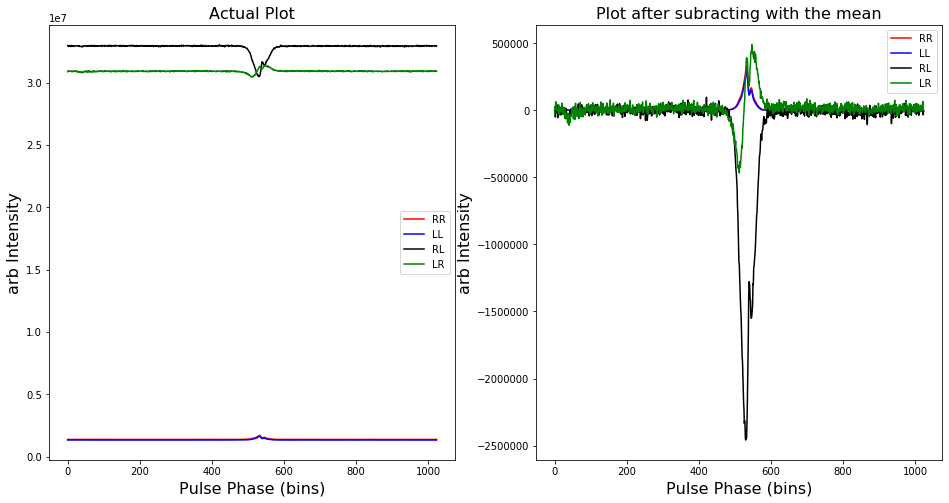

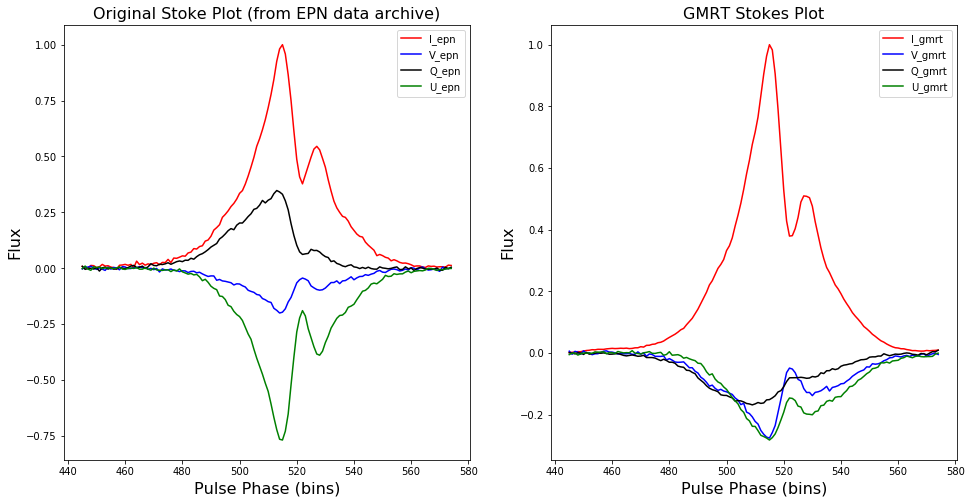

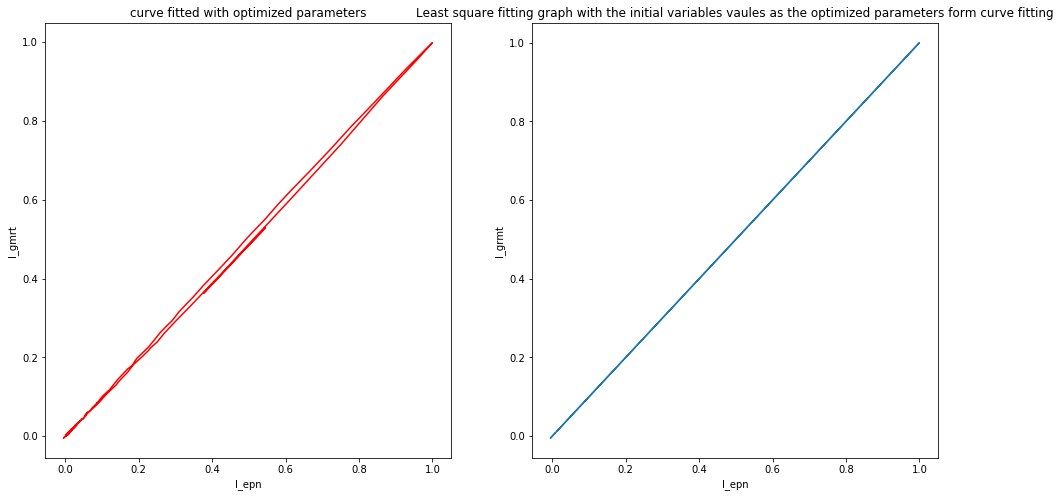

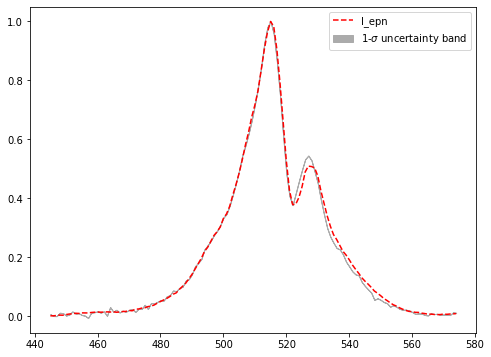

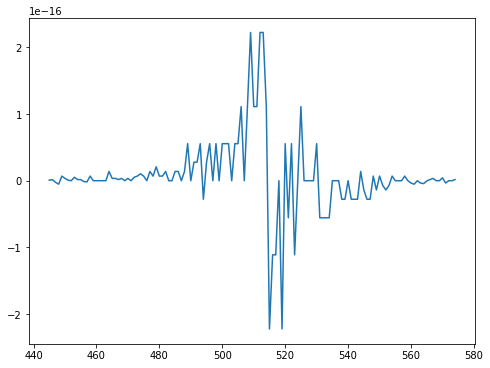

In [15]:
 import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import r2_score
from lmfit import Model, Parameters 

############################################____data_reading_________########################

#Reading our pulsar data in RR, LL, RL, LR, and converting it to I_m, V_m, U_m, V_m

new_header=["RR","LL","RL","LR"]
stokes=pd.read_table('J1932+1059_58875.239237_500_27jan_1.prof', header= None,skiprows=1,names=new_header, sep=" ")
#print(stokes)
rr=stokes.RR
ll=stokes.LL
rl=stokes.RL
lr=stokes.LR

ini=0
fin=200
a=np.mean(rr[ini:fin])
#print(a)
rr_1=rr-a
#print(rr_1)

b=np.mean(ll[ini:fin])
#print(b)
ll_1=ll-b
#print(ll_1)

c=np.mean(rl[ini:fin])
#print(c)
rl_1=rl-c
#print(rl_1)

d=np.mean(lr[ini:fin])
#print(d)
lr_1=lr-d
#print(lr_1)

I_m=rr_1+ll_1
V_m=ll_1-rr_1
Q_m=rl_1+lr_1
U_m=-lr_1+rl_1

#print(np.std(rr_1[0:200]))
#print(np.std(ll_1[0:200]))
#print(np.std(rl_1[0:200]))
#print(np.std(lr_1[0:200]))

#std_noise=((np.std(rr_1[0:200]))+(np.std(ll_1[0:200])))/2
#print(std_noise)
#rl_1/=np.std(rl_1[0:200])/std_noise
#fig=plt.figure(figsize=(16,8))
#plt.plot(num, rr_1, "r")
#plt.plot(num, rl_1, "b")
#lr_1/=np.std(lr_1[0:200])/std_noise

#plt.plot(num, rr_1, "r")
#plt.plot(num, lr_1, "g")
#print("I_m=",I_m)
#print("V_m=",V_m)
#print("Q_m=",Q_m)
#print("U_m=",U_m)


new_header=["Num","I","Q","U","V"]
epn=pd.read_table('epndata.txt',header= None,skiprows=0,names=new_header, sep=" ")
#print(epn)

num=epn.Num
I=epn.I
Q=epn.Q
U=epn.U
V=epn.V

#print("Num=",num)
#print("I=",I)
#print("Q=",Q)
#print("U=",U)
#print("V=",V)



######################################_________data_modeling___________##################################

num_ar=np.array(num[445:575])
#print(num[512])
#print(np.max(I))
I_ar=np.array(I)  
V_ar=np.array(V)
Q_ar=np.array(Q)
U_ar=np.array(U)


I_ep=np.roll(I_ar,208)
V_ep=np.roll(V_ar,208)
Q_ep=np.roll(Q_ar,208)
U_ep=np.roll(U_ar,208)

I_epn=I_ep[445:575]
V_epn=V_ep[445:575]
Q_epn=Q_ep[445:575]
U_epn=U_ep[445:575]

I_norm=I_m/(np.max(I_m))
V_norm=V_m/(np.max(I_m))
Q_norm=Q_m/(np.max(I_m))
U_norm=U_m/(np.max(I_m))


init=0
finl=200
off_pulse_std_V=np.std(V_norm[init:finl])/np.std(I_norm[init:finl])
off_pulse_std_Q=np.std(Q_norm[init:finl])/np.std(I_norm[init:finl])
off_pulse_std_U=np.std(U_norm[init:finl])/np.std(I_norm[init:finl])

roll_data=-17
I_gmr=np.roll(I_norm,(roll_data))
V_gmr=np.roll(V_norm/off_pulse_std_V,(roll_data))
Q_gmr=np.roll(Q_norm/off_pulse_std_Q,(roll_data))
U_gmr=np.roll(U_norm/off_pulse_std_U,(roll_data))

I_std=np.full(shape=130,fill_value=np.std(I_gmr),dtype=float)
#print(I_std)

I_gmrt=I_gmr[445:575]
V_gmrt=V_gmr[445:575]
Q_gmrt=Q_gmr[445:575]
U_gmrt=U_gmr[445:575]


##################################################___plotting____################################################3

fig=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(num,rr, "r",label="RR")
plt.plot(num,ll, "b",label="LL")
plt.plot(num,rl, "k",label="RL")
plt.plot(num,lr, "g",label="LR")
plt.xlabel("Pulse Phase (bins)", fontsize=16)
plt.ylabel("arb Intensity",fontsize=16)
plt.title("Actual Plot",fontsize=16)
plt.legend()

plt.subplot(1,2,2)
plt.plot(num,rr_1, "r",label="RR")
plt.plot(num,ll_1, "b",label="LL")
plt.plot(num,rl_1, "k",label="RL")
plt.plot(num,lr_1, "g",label="LR")
plt.xlabel("Pulse Phase (bins)", fontsize=16)
plt.ylabel("arb Intensity",fontsize=16)
plt.title("Plot after subracting with the mean",fontsize=16)
plt.legend()

fig=plt.figure(figsize=(16,8))
#plt.annotate("peak point",(num[512],np.max(I_epn)))
plt.subplot(1,2,1)
plt.plot(num_ar,I_epn, "r",label="I_epn")
plt.plot(num_ar,V_epn, "b",label="V_epn")
plt.plot(num_ar,Q_epn, "k",label="Q_epn")
plt.plot(num_ar,U_epn, "g",label="U_epn")
plt.xlabel("Pulse Phase (bins)", fontsize=16)
plt.ylabel("Flux",fontsize=16)
plt.title("Original Stoke Plot (from EPN data archive)",fontsize=16)
plt.legend()

plt.subplot(1,2,2)
plt.plot(num_ar,I_gmrt, "r",label="I_gmrt") 
plt.plot(num_ar,V_gmrt, "b",label="V_gmrt")
plt.plot(num_ar,Q_gmrt, "k",label="Q_gmrt")
plt.plot(num_ar,U_gmrt, "g",label="U_gmrt")
plt.xlabel("Pulse Phase (bins)", fontsize=16)
plt.ylabel("Flux",fontsize=16)
plt.title("GMRT Stokes Plot",fontsize=16)
plt.legend()

#plt.subplot(122)
#x=np.sqrt((U_gmrt**2)+(Q_gmrt**2))
#print(x[0:50])
#plt.plot(t,x)
#plt.plot(num_ar,x,"ro", label="I_gmrt")
#plt.legend()


###############################################____curve_fitting___#####################################


def fun1(I,g1,g2,h1,h2,c1,c2,b1,b2):
    Omega=-3.26106
    return (b1**2*I + b2**2*I + g1**2*I + g2**2*I + h1**2*I + h2**2*I + 
            I*c1**2 + I*c2**2 + 2*b2*g1*U_epn - 2*b1*g2*U_epn - 2*h2*c1*U_epn + 2*h1*c2*U_epn + 
            (2*b1*g1*Q_epn + 2*b2*g2*Q_epn - 2*h1*Q_epn*c1 - 2*h2*Q_epn*c2 - b1**2*V_epn - b2**2*V_epn + 
             g1**2*V_epn + g2**2*V_epn - h1**2*V_epn - h2**2*V_epn + c1**2*V_epn + c2**2*V_epn)*np.cos(2*Omega) + 
            (b1**2*Q_epn + b2**2*Q_epn - g1**2*Q_epn - g2**2*Q_epn + h1**2*Q_epn + 
             h2**2*Q_epn - Q_epn*c1**2 - Q_epn*c2**2 + 2*b1*g1*V_epn + 2*b2*g2*V_epn - 2*h1*c1*V_epn - 
             2*h2*c2*V_epn)*np.sin(2*Omega))/2
        

fig=plt.figure(figsize=(16,8))
popt1, pcov1=curve_fit(fun1,I_gmrt,I_epn, sigma=I_std)
print("values of optimized parameters = ",np.around(popt1,decimals=8))
#print(np.around(pcov1/10**10,decimals=2)) 
#print("dialgonal elements squrt root",np.sqrt(np.diag(pcov1)))
plt.subplot(121)
plt.plot(I_epn, fun1(I_epn, *popt1), 'r')
plt.xlabel('I_epn')
plt.ylabel('I_gmrt')
plt.title("curve fitted with optimized parameters")




#####################################################____least_square_fitting___#############################
Imodel=Model(fun1)

value1=0.2847535
value2=0.57159102
value3=0.2907431
value4=0.31492729
value5=0.29174965
value6=1.12236536
value7=0.51583814
value8=0.09509682

params=Parameters()
params.add("g1", value1)
params.add("g2", value2)
params.add("h1", value3) 
params.add("h2", value4) 
params.add("c1", value5)
params.add("c2", value6)
params.add("b1", value7)
params.add("b2", value8)


Iresult = Imodel.fit(I_epn,params, I=I_epn, weights=I_std)
print(Iresult.fit_report())

plt.subplot(122)
plt.plot(I_epn, Iresult.best_fit)

plt.xlabel('I_epn')
plt.ylabel('I_grmt')
plt.title("Least square fitting graph with the initial variables vaules as the optimized parameters form curve fitting")

fig=plt.figure(figsize=(8,6))
Idelay = Iresult.eval_uncertainty(sigma=1)
print("uncertainties=",Idelay)
plt.plot(num_ar,I_gmrt, "r--", label="I_epn")
plt.fill_between(num_ar, Iresult.best_fit-Idelay, Iresult.best_fit+Idelay, color="#ABABAB",label='1-$\sigma$ uncertainty band')
plt.legend()



##################################################_____checking_data_____####################################################


print("R^2 with optimised parameters (if close to 1--well fitted, if close to 0--not fitted well) = ",r2_score(I_epn, fun1(I_epn,*(popt1))))
print("R^2 with final values of parameters (if close to 1--well fitted, if close to 0--not fitted well) = ",r2_score(I_epn,Iresult.best_fit))

print("I_epn=",I_epn[50:100])
print("I_scaled_value_21_1 = ",Iresult.best_fit[50:100])
fig=plt.figure(figsize=(8,6))
plt.plot(num_ar,I_epn-Iresult.best_fit)
#plt.legend()

I_21_2=[0.32723760, 0.60830137, 0.30155235, 0.62143477, 0.09618929, 0.71668167 , 0.52468871, 0.4975809] #100_closeness
I_27_2=[0.58033165, 0.49965708, 0.71358508, 0.27791790, 0.30562833, 0.56581737, 0.64307036, 0.00429997] #100_closeness
I_27_1=[0.01573421, 0.43972227,0.79453538, 0.45284632, -0.36450294, -0.3583949, 0.34792027, -0.91348201]#0.99749 closeness

a=[1,2,3,4,5,6,7]
print(a[2:6])

In [24]:
import os 
os.listdir()
I1=[0.34811068, 0.64023759, 0.60132926, 0.41168961, 0.28494388, 0.62267309, 0.59030908, 0.34705903]
I12=[0.37523681, 0.52929914, 0.36551505, 0.53605876,  0.26961855, 0.71157965, 0.57316499, 0.50052138]
I2=[0.44043219,0.65962647, 0.69362224, 0.38467619, 0.31928005, 0.51862574, 0.54313302,0.27553391  ]
I22=[0.51620868, 0.61960102, 0.68392817 , 0.42733954,  0.26478247, 0.52869028, 0.55973486, 0.19057822 ]
I3=[0.30707244,0.56751460, 0.44197903 , 0.47012853, 0.20533439, 0.73584746, 0.63378210, 0.42656060 ]
I33=[0.22647270, 0.52465554, 0.29136512, 0.49158894,  0.10734427, 0.81358705, 0.59514161, 0.56502490 ]
I4=[0.40938029, 0.50436433,0.46731627, 0.45121072, 0.40503576, 0.64340534, 0.60621623, 0.45883142 ]
I44=[0.36708045, 0.51560230, 0.56122328, 0.29261274, 0.52662326,0.56751577, 0.63460387, 0.44349086  ]
I5=[0.52670753, 0.46983148,0.61573330, 0.34501440, 0.40901748, 0.57839629 ,0.68005883, 0.19838735 ]
I55=[0.37280366 ,0.50182874, 0.53822864, 0.31800091, 0.31125733, 0.71575430, 0.74450154, 0.23431348 ]

['.astropy',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.spyder-py3',
 '.ssh',
 '.VirtualBox',
 '3D Objects',
 'ajay.ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'assignment2.ipynb',
 'assignmnet.ipynb',
 'cal.ipynb',
 'calib.ipynb',
 'calibration U.ipynb',
 'calibration_I.ipynb',
 'Calibration_Q.ipynb',
 'calibration_v.ipynb',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'epndata.txt',
 'epndata1.prof',
 'Favorites',
 'file_read_write.ipynb',
 'import',
 'IntelGraphicsProfiles',
 'J1932+1059_58869.245036_500_21jan_1.ipynb',
 'J1932+1059_58869.245036_500_21jan_1.prof',
 'J1932+1059_58869.307873_500_21jan_2.ipynb',
 'J1932+1059_58869.307873_500_21jan_2.prof',
 'J1932+1059_58875.239237_500_27jan_1.prof',
 'J1932+1059_58875.294710_500_27jan_2.prof',
 'J1932+1059_58888.208489_500_09feb_1.prof',
 'J1932+1059_58888.257997_500_09feb_2.prof',
 'J1932+1059_58890.205836_500_11feb_1.prof',
 'J1932+1059_58890.262218_500_11feb_2.pr

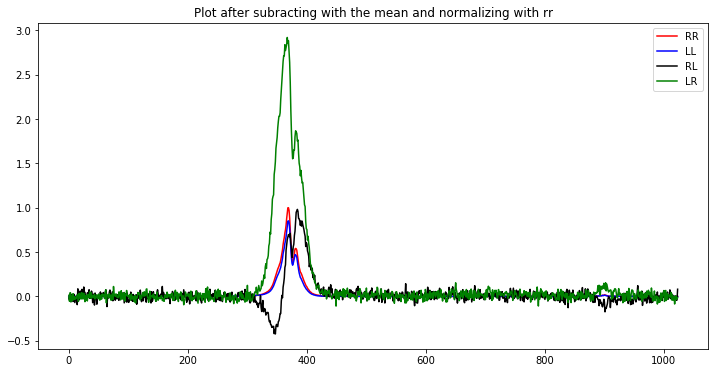

In [11]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import r2_score
from lmfit import Model 

############################################____data_reading_________########################

#Reading our pulsar data in RR, LL, RL, LR, and converting it to I_m, V_m, U_m, V_m

new_header=["RR","LL","RL","LR"]
stokes=pd.read_table('J1932+1059_58897.254621_500_18feb_2.prof', header= None,skiprows=1,names=new_header, sep=" ")
#print(stokes)
rr=stokes.RR
ll=stokes.LL
rl=stokes.RL
lr=stokes.LR

ini=0
fin=300
a=np.mean(rr[ini:fin])
#print(a)
rr_1=rr-a
#print(rr_1)

b=np.mean(ll[ini:fin])
#print(b)
ll_1=ll-b
#print(ll_1)

c=np.mean(rl[ini:fin])
#print(c)
rl_1=rl-c
#print(rl_1)

d=np.mean(lr[ini:fin])
#print(d)
lr_1=lr-d
#print(lr_1)
num=np.linspace(0,1023,1024)
I_m=rr_1+ll_1
V_m=ll_1-rr_1
Q_m=rl_1+lr_1
U_m=-lr_1+rl_1
fig=plt.figure(figsize=(12,6))
plt.plot(num,rr_1/np.max(rr_1), "r",label="RR")
plt.plot(num,ll_1/np.max(rr_1), "b",label="LL")
plt.plot(num,rl_1/np.max(rr_1), "k",label="RL")
plt.plot(num,lr_1/np.max(rr_1), "g",label="LR")
plt.title("Plot after subracting with the mean and normalizing with rr")
plt.legend()